## Final Project Submission

Please fill out:
* Student name: Jasper Chen
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [95]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import sqlite3
from pandasql import sqldf
import matplotlib.pyplot as plt

pysqldf = lambda q: sqldf(q, globals())

conn = sqlite3.connect('zippeddata/im.db')


In [125]:
q = '''
SELECT * FROM movie_basics AS mb
JOIN movie_ratings AS mr ON mr.movie_id = mb.movie_id
'''

moviesdf = pd.read_sql(q, conn)
moviesdf.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,tt0069049,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",tt0069204,6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",tt0100275,6.5,119


In [97]:
bomdf = pd.read_csv('zippeddata/bom.movie_gross.csv.gz')
bomdf

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [121]:
budgetsdf = pd.read_csv("zippeddata/tn.movie_budgets.csv.gz")
budgetsdf['worldwide_gross'] = budgetsdf['worldwide_gross'].replace('[$,]', '', regex=True).astype(float)
budgetsdf['domestic_gross'] = budgetsdf['domestic_gross'].replace('[$,]', '', regex=True).astype(float)
budgetsdf['production_budget'] = budgetsdf['production_budget'].replace('[$,]', '', regex=True).astype(float)
budgetsdf


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   int64  
 1   release_date       5782 non-null   object 
 2   movie              5782 non-null   object 
 3   production_budget  5782 non-null   float64
 4   domestic_gross     5782 non-null   float64
 5   worldwide_gross    5782 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 271.2+ KB


In [144]:
# bom.head()
# Calculate profit and profit ratio per movie (profit/budget)

q = """
SELECT (budgets.domestic_gross - production_budget) AS profit,
(budgets.domestic_gross - production_budget) / production_budget AS profit_ratio,
genres
FROM moviesdf AS m
JOIN bomdf AS b
ON m.primary_title = b.title
JOIN budgetsdf AS budgets
ON budgets.movie = b.title
"""
rawdf = pysqldf(q)
# df.head()
rawdf = rawdf.set_index(['profit', 'profit_ratio']).apply(lambda x: x.str.split(',').explode()).reset_index()




,genre,avg_profit,avg_profit_ratio
0,Animation,3.922430e+07,0.409326
1,Western,-8.170124e+06,-0.034220
2,Thriller,1.231056e+07,2.685076
3,Comedy,2.164380e+07,0.965937
4,Adventure,2.010748e+07,0.292510


In [150]:

q2 = """SELECT genres AS genre, AVG(profit) AS avg_profit, AVG(profit_ratio) AS avg_profit_ratio
FROM rawdf
GROUP BY genre
ORDER BY profit"""
df = pysqldf(q2)
df.head()

,genre,avg_profit,avg_profit_ratio
0,Animation,3.922430e+07,0.409326
1,Western,-8.170124e+06,-0.034220
2,Thriller,1.231056e+07,2.685076
3,Comedy,2.164380e+07,0.965937
4,Adventure,2.010748e+07,0.292510


Text(0.5, 1.0, 'Profit ratio vs Genre')

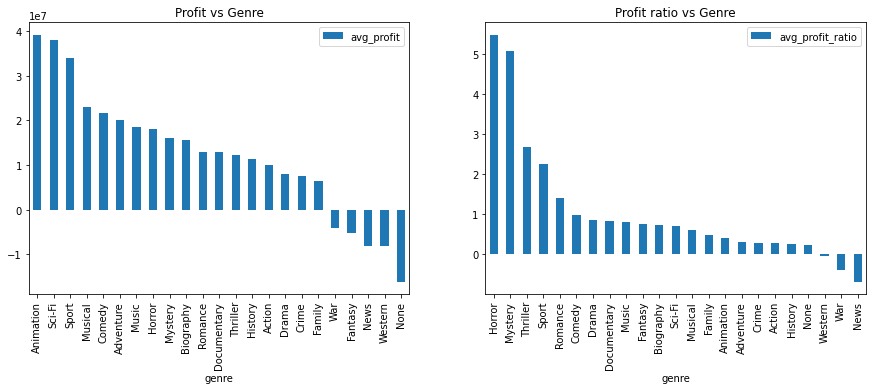

In [151]:
# Bar charts showing profit vs genre
fig, (ax1, ax2) = plt.subplots(1,2)
df.sort_values('avg_profit', inplace=True, ascending=False)
df.plot.bar(x='genre', y='avg_profit', ax=ax1, figsize=(15,5));
df.sort_values('avg_profit_ratio', inplace=True, ascending=False)
df.plot.bar(x='genre', y='avg_profit_ratio', ax=ax2)
ax1.set_title('Profit vs Genre')
ax2.set_title('Profit ratio vs Genre')

In [ ]:
# Actors
q = '''
SELECT * FROM persons
JOIN principals ON persons.person_id = principals.person_id
JOIN writers ON 
'''

moviesdf = pd.read_sql(q, conn)
moviesdf.head()